!['Imagen de una galaxia'](https://storage.googleapis.com/kaggle-datasets-images/391127/754362/716e456635d5f732fe04c7519ff6dfa5/dataset-cover.jpg?t=2019-10-22-02-56-07 "Title")

# Introducción a Probabilidad y Estadística para Data Science
# **Clase 3- Ejercicios** 📝

El archivo **stars.csv** contiene información de 240 estrellas y los siguientes datos sobre ellas:
* Absolute Temperature (in K)
* Relative Luminosity (L/Lo)
* Relative Radius (R/Ro)
* Absolute Magnitude (Mv)
* Star Color (white,Red,Blue,Yellow,yellow-orange etc)
* Spectral Class (O,B,A,F,G,K,,M)
* Star Type (Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)
* Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)
* Ro = 6.9551 x 10^8 m (Avg Radius of Sun)

Elijan al menos dos columnas para realizar un análisis similar al visto en clase.



In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

# 1. Vistazo inicial de los datos

In [3]:
df = pd.read_csv('stars.csv')

In [4]:
df.head(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068.0,0.002400,0.1700,16.12,0.0,Red,M
1,3042.0,0.000500,0.1542,16.60,0.0,Red,M
2,2600.0,0.000300,0.1020,18.70,0.0,Red,M
3,2800.0,0.000200,0.1600,16.65,0.0,Red,NaN
4,1939.0,0.000138,0.1030,20.06,0.0,Red,M
5,2840.0,0.000650,0.1100,NaN,0.0,Red,M
6,2637.0,0.000730,0.1270,17.22,0.0,Red,M
7,2600.0,0.000400,0.0960,NaN,0.0,Red,M
8,2650.0,0.000690,0.1100,17.45,0.0,Red,M
9,2700.0,0.000180,0.1300,16.05,0.0,Red,M


In [5]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,236.000000,238.000000,238.000000,237.000000,239.000000
mean,10580.220339,108089.104149,234.402766,4.240274,2.497908
std,9595.893841,179916.244091,515.847412,10.519383,1.714678
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3390.500000,0.000854,0.104500,-6.240000,1.000000
50%,5868.000000,0.119000,0.762500,6.228000,2.000000
75%,15377.000000,198150.000000,41.250000,13.667000,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [6]:
# Cantidad de NaN por columna
df.isna().sum()

Temperature (K)           4
Luminosity(L/Lo)          2
Radius(R/Ro)              2
Absolute magnitude(Mv)    3
Star type                 1
Star color                2
Spectral Class            1
dtype: int64

# 2.Limpieza del dataset

In [7]:
# Copia de df y eliminación de filas con dato faltante
df_cleaned = df.copy().dropna()

In [8]:
df_cleaned.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,225.000000,225.000000,225.000000,225.000000,225.000000
mean,10679.168889,111007.626395,247.933333,3.891604,2.573333
std,9678.331546,178278.310371,527.423077,10.586911,1.710054
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3441.000000,0.000900,0.110000,-6.270000,1.000000
50%,6380.000000,0.819000,0.990000,4.680000,3.000000
75%,15276.000000,200000.000000,57.000000,13.670000,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


Elegí eliminar las filas que tienen un dato faltante, en total se eliminaron 11 filas. 

# 3.Star types

In [9]:
star_type_agrupado = df_cleaned.groupby('Star type')[['Star color']].count()
star_type_agrupado.rename(columns={'Star color': 'Number of stars'}, inplace=True)
star_type_agrupado.reset_index(inplace=True)
star_type_agrupado

,Star type,Number of stars
0,0.0,36
1,1.0,35
2,2.0,36
3,3.0,39
4,4.0,40
5,5.0,39


### 3.1.Bar Graphic

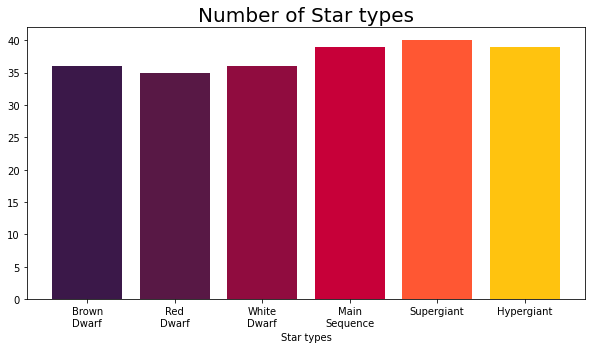

In [10]:
colors = ['#3B1849', '#581845', '#900C3F', '#C70039', '#FF5733', '#FFC30F']
x = ['Brown\nDwarf', 'Red\nDwarf', 'White\nDwarf', 'Main\nSequence', 'Supergiant', 'Hypergiant']

fig = plt.figure(figsize=(10, 5))
plt.bar(x, star_type_agrupado['Number of stars'], color=colors)
plt.title('Number of Star types', fontsize=20)
plt.xlabel('Star types')
plt.show()

### 3.2.Star type and Spectral class - Grouped Bar graphic

In [11]:
star_type_spectral = df_cleaned.groupby(['Spectral Class', 'Star type'])[['Star color']].count()
star_type_spectral.rename(columns={'Star color': 'stars'}, inplace=True)
star_type_spectral.reset_index(inplace=True)
star_type_spectral

,Spectral Class,Star type,stars
0,A,2.0,7
1,A,3.0,10
2,A,5.0,2
3,B,2.0,21
4,B,3.0,13
5,B,4.0,2
6,B,5.0,6
7,F,2.0,8
8,F,3.0,7
9,G,5.0,1


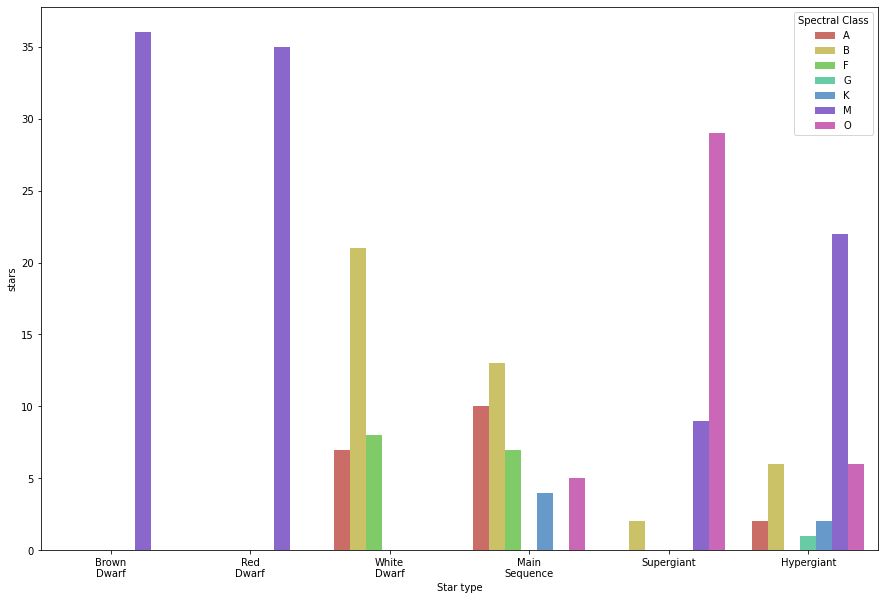

In [12]:
palette = sns.color_palette("hls", 7)
fig = plt.figure(figsize=(15, 10))

ax = sns.barplot(data=star_type_spectral, x='Star type', y='stars', hue='Spectral Class', palette=palette)
ax.set_xticklabels(x)
plt.show()

# 4.Temperature

In [13]:
df_cleaned['Temperature (K)'].describe()

count      225.000000
mean     10679.168889
std       9678.331546
min       1939.000000
25%       3441.000000
50%       6380.000000
75%      15276.000000
max      40000.000000
Name: Temperature (K), dtype: float64

### 4.1.Quartiles

In [14]:
# Cálculo de cuartiles con interpolación midpoint

q1 = df_cleaned['Temperature (K)'].quantile(0.25, interpolation='midpoint')
q2 = df_cleaned['Temperature (K)'].quantile(0.5, interpolation='midpoint')
q3 = df_cleaned['Temperature (K)'].quantile(0.75, interpolation='midpoint')
q4 = df_cleaned['Temperature (K)'].quantile(1, interpolation='midpoint')

print(f'Q1 = {q1}\nQ2 = {q2}\nQ3 = {q3}\nQ4 = {q4}')

Q1 = 3441.0
Q2 = 6380.0
Q3 = 15276.0
Q4 = 40000.0


In [15]:
# Interquartile range 
int_range = q3 - q1
print(int_range)

11835.0


In [16]:
print(q3 - q2)
print(q2 - q1)
q3 - q2 > q2 - q1 # positive skewed

8896.0
2939.0


True

### 4.2.Outliers

In [17]:
# Calcular el límite inferior y superior 

lim_sup = float(q3 + 1*int_range)
lim_inf = float(q3 - 1*int_range)
print(lim_sup)
print(lim_inf)

27111.0
3441.0


In [18]:
# cantidad de outliers

df_cleaned['Temperature (K)'][(df_cleaned['Temperature (K)']> lim_sup) | df_cleaned['Temperature (K)'] < lim_inf].count()

225

### 4.3.Boxplot

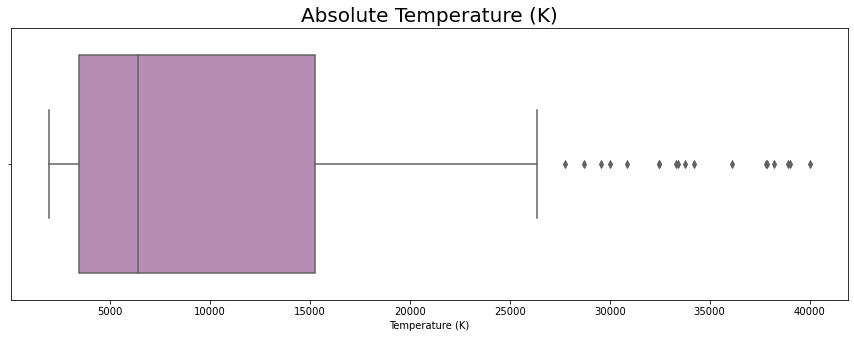

In [19]:
color = '#BD87BB'

fig = plt.figure(figsize=(15, 5)) 
sns.boxplot(data=df_cleaned, x='Temperature (K)', whis=1, color=color) 
plt.title('Absolute Temperature (K)',  fontsize=20) 
plt.show()

### 4.4.Histograma

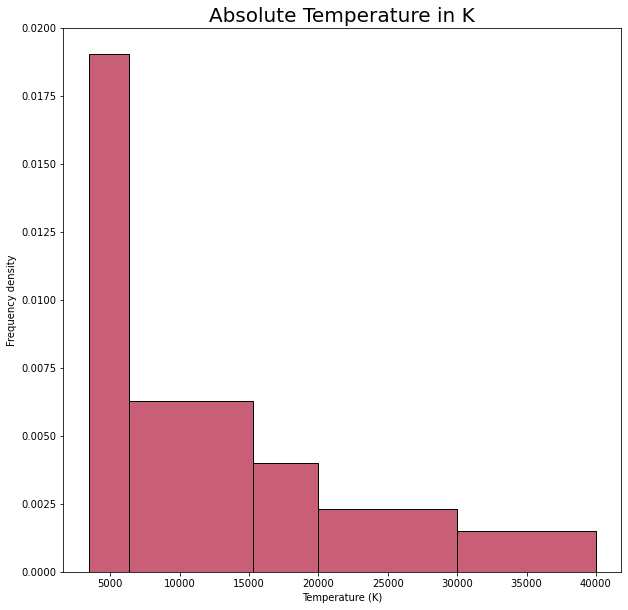

In [20]:
color = '#b82a48'
bins = [q1, q2, q3, 20000, 30000, q4]

fig = plt.figure(figsize=(10, 10)) 
sns.histplot(data=df_cleaned, x='Temperature (K)', bins=bins,stat='frequency', color=color)
plt.title('Absolute Temperature in K', fontsize=20)
plt.ylabel('Frequency density')
plt.show()

**Teniendo en cuenta los gráficos se puede visualizar que la distribución no es simétrica, los datos se encuentran sesgados a la derecha.**

# 5. Relación entre variables

### 5.1.Luminosity vs Absolute magnitude

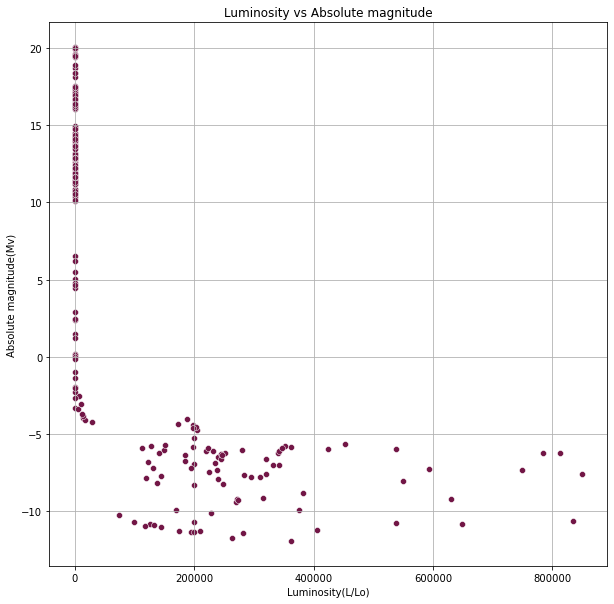

In [21]:
color = '#721646'

fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_cleaned, x='Luminosity(L/Lo)', y='Absolute magnitude(Mv)', color=color)
plt.title('Luminosity vs Absolute magnitude')
plt.xlabel('Luminosity(L/Lo)')
plt.ylabel('Absolute magnitude(Mv)')
plt.grid()
plt.show()